# Brexit - The Fall of the Great British Pound

The UK economy was recovering robustly from the 2008 financial crisis. By 2013, economic growth had picked up, and the UK was seen as one of the fastest-growing major economies in Europe. Then Brexit happened.

At the time, Brexit was a topic of major interest for all. Economists expressed major concerns of the impact that Brexit would have on the UK economy. The campaign saw three different prime ministers over its lifespan and the introduction of Covid-19.

In this project we will be examining the exchange rates of the Euro against the Pound Sterling, utilising explanatory data visualisation techniques to showcase fluctuations during Brexit.

### Table of Contents

* [The Dataset](#The-Dataset)
* [Data Cleaning](#Data-Cleaning)
* [Rolling Mean](#Rolling-Mean)
* [Seperating Dataset Into Sections](#Seperating-Dataset-Into-Sections)
* [Euro-GBP Exchange Rate During Brexit (Covid)](#Euro-GBP-Exchange-Rate-During-Brexit-(Covid))
* [Euro-GBP Exchange Rate During Each Prime Minister](#Euro-GBP-Exchange-Rate-During-Each-Prime-Minister)
* [Conclusion](#Conclusion)

### The Dataset

The dataset was put together by Daria Chemkaeva and made available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). Note that the dataset gets regular updates and the version used in this project was downloaded on January 2021.

In [1]:
#Import libraries and read in dataset

import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import seaborn as sns

exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

#Enable Jupyter to display graphs

%matplotlib inline

In [2]:
#Inspect first 5 rows of the dataset

exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
#Inspect last 5 rows of the dataset

exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
#Examine basic facts about the dataset

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

##### Initial Analysis

Our dataset has 5,699 rows and 41 columns, each noting the exchange rates of different currencies against the Euro on a daily basis over a 22 year period from 1999-01-04 to 2021-01-08. 

There are no null values in the columns we intend to analyse.

The data types of many of the currency columns are set to objects. These need to be changed to floats before we can begin our analysis.

### Data Cleaning

As our analysis will only be focusing on data from the `Period\Unit:` and `UK pound sterling ` columns, we will rename these columns and change their datatypes.

Then we will isolate these columns and create a separate dataframe.

This will make our code clean, easier to work with and analyse.

In [5]:
#Rename colums

exchange_rates.rename(columns={'[UK pound sterling ]': 'gbp','Period\\Unit:': 'time'},
                      inplace=True)

#Convert "Time" to "datetime" datatype, sort values and reset index

exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates.sort_values('time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

#Isolate columns into a separate dataframe

euro_gbp = exchange_rates[['time','gbp']]
euro_gbp["gbp"].value_counts()

-          62
0.63040     7
0.84560     7
0.68880     7
0.90430     7
           ..
0.90063     1
0.82210     1
0.88090     1
0.71600     1
0.63680     1
Name: gbp, Length: 3470, dtype: int64

The `-` character appears 62 times and would indicate rows of missing data. As this is approximately 1% of our overall data, we can drop these rows.

In [6]:
#Drop rows of missing data

euro_gbp = euro_gbp.drop(euro_gbp[euro_gbp["gbp"] == "-"].index)

#Convert datatype to float

euro_gbp["gbp"] = euro_gbp["gbp"].astype("float")

### Rolling Mean

The data is cleaned. Now we will generate a line plot to visualise the evolution of the euro-gbp exchange rate.

However, our data spans over 22 years, giving us daily updates. We are looking for long-term trends; plotting each row would make our graphs messy and wouldnt help provide any more visual insight. 

We will utilise the rolling mean with a window of 30 days(monthly average). This will visually impact the graphs we create for our audience, drawing their attention to long-term trends and improving the readability of what we are trying to convey. 

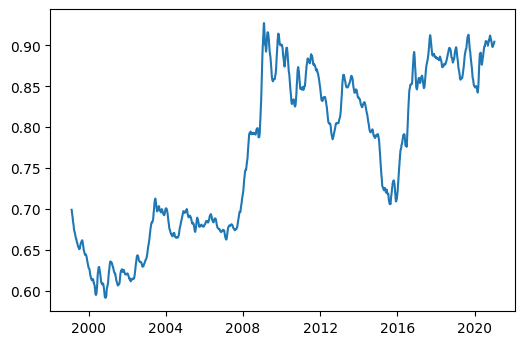

In [7]:
#Add a new column titled "rolling_mean"
#Calculate rolling means for "gbp" and add them to "rolling_mean" column

euro_gbp["rolling_mean"] = euro_gbp["gbp"].rolling(30).mean()

#Plot the time against rolling mean

plt.plot(euro_gbp["time"],
         euro_gbp["rolling_mean"])
plt.show()

### Seperating Dataset Into Sections

Our timeline for begins when Brexit was first announced in January 2013 and ends with the transitioning period in December 2020. The exchange rates show major dips and rises in those periods.
Lets begin by zooming in on that period.

We will also create splits of our dataset relating to the time periods of each prime minister. This will allow us to easily plot each period onto separate graphs and create interesting visuals when combining them on a single graph.

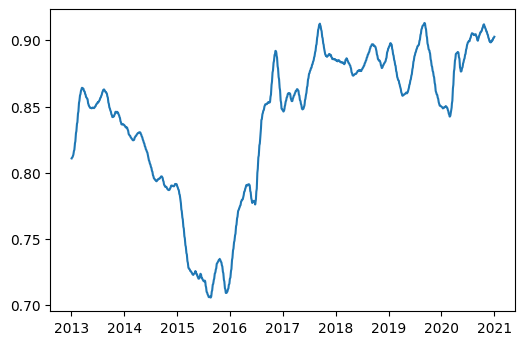

In [8]:
#Isolate data from 2013-01-01 to 2020-12-31 and then by periods of each prime minister

euro_gbp_13_20 = euro_gbp[(euro_gbp["time"] >= "2013-01-01") &
                          (euro_gbp["time"] <= "2020-12-31")]

euro_gbp_cameron = euro_gbp[(euro_gbp["time"] >= "2013-01-01") &
                          (euro_gbp["time"] <= "2016-07-12")]

euro_gbp_may = euro_gbp[(euro_gbp["time"] >= "2016-07-13") &
                          (euro_gbp["time"] <= "2019-07-24")]

euro_gbp_johnson = euro_gbp[(euro_gbp["time"] >= "2019-07-25") &
                          (euro_gbp["time"] <= "2020-12-31")]

plt.plot(euro_gbp_13_20["time"], euro_gbp_13_20["rolling_mean"])
plt.show()

### Euro-GBP Exchange Rate During Brexit (Covid)

Now we have a rough idea of what our data looks like on a graph, we can begin to think about designing a graph, considering ease of readability and where we want our audience to look.

We want to design our graphs with good data-ink ratios, removing any lines that could be considered unnecessary. Keeping [Gestalt principles](https://www.toptal.com/designers/ui/gestalt-principles-of-design#:~:text=Our%20brains%20are%20built%20to,order%20(also%20called%20pr%C3%A4gnanz).) in mind will also help us design graphs that effictively draw our audience's attention where we want.

Below we will utilise these ideas in our graph design to highlight the Covid period within our Brexit timeline to show how the Euro-GBP exchange rate trends behaved before and during Covid-19.

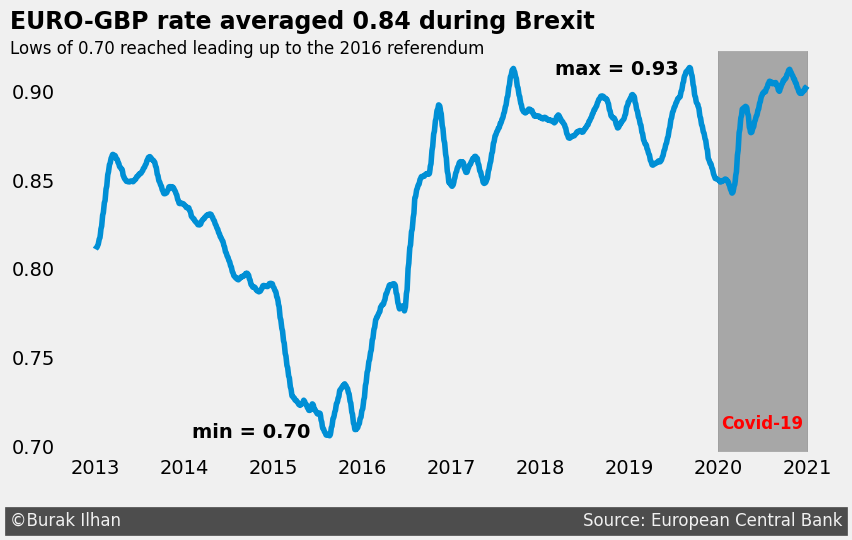

In [53]:
#Generate a graph drawing attention to min/max values and the first year of Covid-19

fig, ax = plt.subplots(figsize=(9,5))
style.use("fivethirtyeight")

#Plot the data onto a graph, remove grid

ax.plot(euro_gbp_13_20["time"], euro_gbp_13_20["rolling_mean"])
ax.grid(b=False)

#Add a transparant rectangle highlighting the covid period

ax.axvspan(*mdates.datestr2num(['2020-01-01', '2020-12-31']), color = "black", alpha=0.3)

#Add all the text information on the graph

ax.text(734520, 0.935, 'EURO-GBP rate averaged 0.84 during Brexit',size=17, weight='bold')
ax.text(734520, 0.921, 'Lows of 0.70 reached leading up to the 2016 referendum',size=12)
ax.text(734520, 0.655, '©Burak Ilhan' + ' '*88 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor = '#4d4d4d',
      size=12)
ax.text(mdates.datestr2num("2020-01-15"), 0.71, "Covid-19", color = "red", size = 12, weight = "bold")
ax.text(mdates.datestr2num("2014-02-01"), 0.705, "min = 0.70", weight = "bold")
ax.text(mdates.datestr2num("2018-03-01"), 0.909, "max = 0.93", weight = "bold")

plt.show()

From the plot above, we can see that leading up to the referendum 2016, the GBP was doing well, gaining strength against the Euro. However, we see a massive weakening of the Pound Sterling after the referendum between 2016 and 2017.

Trends seemed be improving heading into 2020, but with the introduction of Covid-19, we can see the exchange rate go back up around the 0.90 mark.

### Euro-GBP Exchange Rate During Each Prime Minister

Next we will seek to highlight each prime minister's periods separately and then bring them together to examine how trends changed under their leadership.

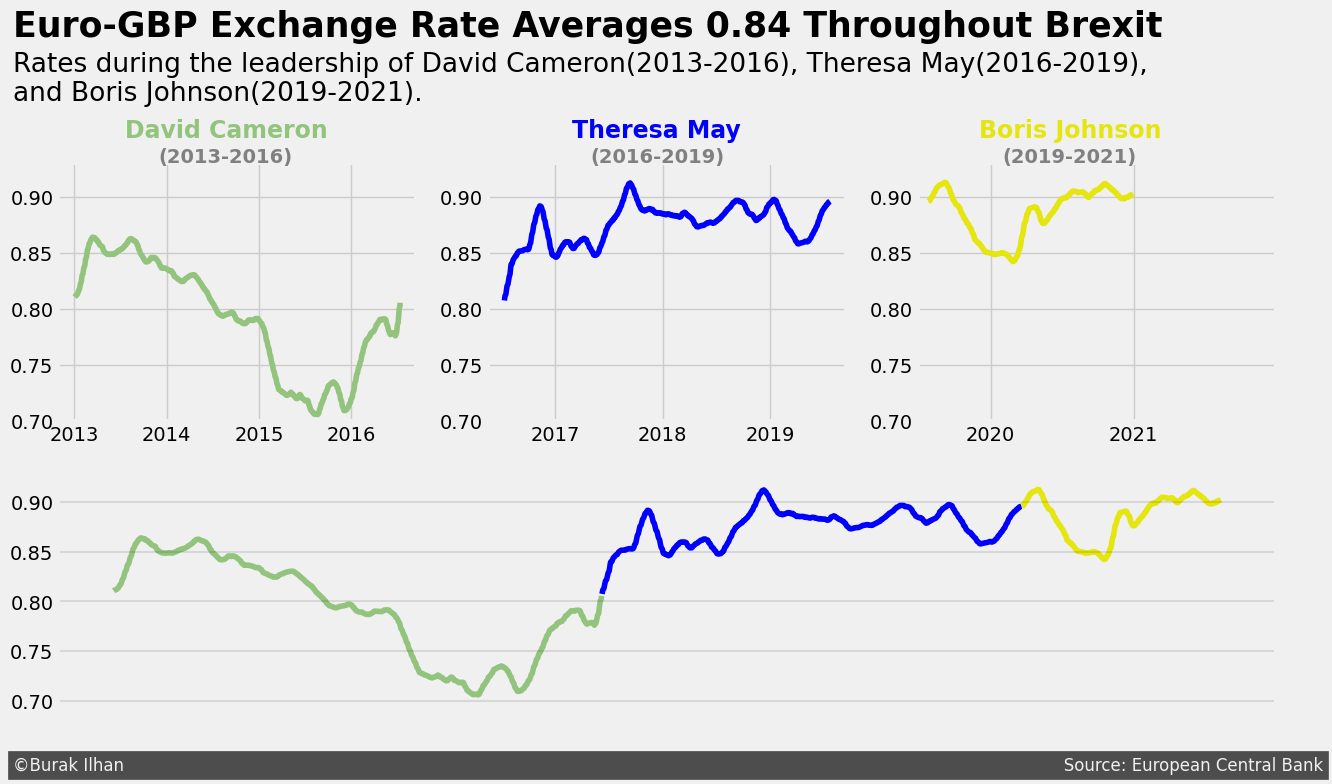

In [122]:
#Generate 4 separate graphs, 3 small on top, one large underneath

fig = plt.figure(figsize=(14, 7))
style.use("fivethirtyeight")
gs = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

#Plot 1) A graph for David Cameron period

ax1.plot(euro_gbp_cameron["time"], euro_gbp_cameron["rolling_mean"], color = "#93c47d")
ax1.set_ylim([0.70, 0.93])
ax1.set_xticks([mdates.datestr2num("2013-01-01"),
                mdates.datestr2num("2014-01-01"),
                mdates.datestr2num("2015-01-01"),
                mdates.datestr2num("2016-01-01")])
ax1.set_xticklabels(["2013", "2014", "2015", "2016"])
ax1.text(mdates.datestr2num("2013-07-20"), 0.953, "David Cameron", weight="bold", c="#93c47d", size=17)
ax1.text(mdates.datestr2num("2013-12-01"), 0.931, "(2013-2016)", weight="bold", c="grey", size=14)


#Plot 2) A graph for Therasa May period

ax2.plot(euro_gbp_may["time"], euro_gbp_may["rolling_mean"], color = "Blue")
ax2.set_ylim([0.70, 0.93])
ax2.set_xticks([mdates.datestr2num("2017-01-01"),
                mdates.datestr2num("2018-01-01"),
                mdates.datestr2num("2019-01-01")])
ax2.set_xticklabels(["2017", "2018", "2019"])
ax2.text(mdates.datestr2num("2017-03-01"), 0.953, "Theresa May", weight="bold", c="Blue", size=17)
ax2.text(mdates.datestr2num("2017-05-01"), 0.931, "(2016-2019)", weight="bold", c="grey", size=14)

#Plot 3) A graph for Boris Johnson

ax3.plot(euro_gbp_johnson["time"], euro_gbp_johnson["rolling_mean"], color = "#E5E50F")
ax3.set_ylim([0.70, 0.93])
ax3.set_xticks([mdates.datestr2num("2020-01-01"),
                mdates.datestr2num("2021-01-01"),
                mdates.datestr2num("2022-01-01")])
ax3.set_xticklabels(["2020", "2021", ""])
ax3.text(mdates.datestr2num("2019-12-01"), 0.953, "Boris Johnson", 
         weight="bold", c="#E5E50F", size=17)
ax3.text(mdates.datestr2num("2020-02-01"), 0.931, "(2019-2021)", weight="bold", c="grey", size=14)

#Plot 4) A graph combining all 3 in their own colour across one timeline

ax4.plot(euro_gbp_cameron["time"], euro_gbp_cameron["rolling_mean"], color = "#93c47d")
ax4.plot(euro_gbp_may["time"], euro_gbp_may["rolling_mean"], color = "Blue")
ax4.plot(euro_gbp_johnson["time"], euro_gbp_johnson["rolling_mean"], color = "#E5E50F")
ax4.grid(b=False)
ax4.set_ylim([0.67, 0.93])
ax4.set_xticklabels([])
ax4.axhline(y = 0.90, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.85, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.80, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.75, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.70, color = "black", linewidth = 1.5, alpha = 0.1)

#Add titles and reference line

ax4.text(mdates.datestr2num("2012-04-11"), 1.37, 
         "Euro-GBP Exchange Rate Averages 0.84 Throughout Brexit",
        size = 25, weight = 'bold')
ax4.text(mdates.datestr2num("2012-04-11"), 1.335, 
         "Rates during the leadership of David Cameron(2013-2016), Theresa May(2016-2019),",
         size = 19)
ax4.text(mdates.datestr2num("2012-04-11"), 1.305,
         "and Boris Johnson(2019-2021).",
         size = 19)
ax4.text(mdates.datestr2num("2012-04-11"), 0.63, '©Burak Ilhan' + ' '*179 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor = '#4d4d4d',
      size=12)


plt.show()


From the above, we can infer that David Cameron was doing well leading up to the referendum in 2016, at which point we start to see a decline before his resignation in July of 2016.

During May's leadership, we can see exchange rates climb above 0.90 hover around there until her resignation in July of 2019.

With Boris Johnson taking the reigns, we can see a trend of slight improvement with exchange rates dipping below 0.85 in 2020 for the first time in 3 years. However it climbed back up between 2020 and 2021, the first year of Covid-19.

### Conclusion

In this project we have explored the evolution of the Euro-GBP exchange rate through-out Brexit. Since it was announced, the rates reached lows of approximately 0.70 in 2015. We can see that after the 2016 referendum, the GBP took more of a hit than the Euro, reaching highs of approximately 0.93. This is the highest its been since the [Global Financial Crisis](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis) in 2007-2008.

Covid-19 did not prove much help either with a seemingly downward trend shooting back up between 2020 and 2021.

Examining the rates during each prime minister gives us a very rough idea of how well they each did throughout Brexit. 

It was interesting to see that David Cameron appeared to be doing well, until the results of the referendum at which point rates began to tank. 

Theresa May took over a sinking ship and did not appear to be able to regain control, barely surviving a [vote of no confidence](https://www.bbc.co.uk/news/uk-politics-46899466). Rates only got worse under her leadership before her resignation in 2019. 

When Boris Johnson took charge, we do see a slight improvement in rates, however he did not seem to be able to keep the trend going after having to deal with Covid-19.